In [1]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "../csv_output/output_video_marvel_opt30_25.csv"

# Načtení CSV souboru do DataFrame
df = pd.read_csv(csv_path)


In [207]:
df['Dominant'] = df[['Prob_ShotType_CLOSE_UP', 'Prob_ShotType_MEDIUM', 'Prob_ShotType_WIDE']].idxmax(axis=1)

dominant_counts = df['Dominant'].value_counts()

total_frames = dominant_counts.sum()

ratios_all = {
    'CLOSE_UP': 100 * dominant_counts.get('Prob_ShotType_CLOSE_UP', 0) / total_frames,
    'MEDIUM':   100 * dominant_counts.get('Prob_ShotType_MEDIUM', 0) / total_frames,
    'WIDE':     100 * dominant_counts.get('Prob_ShotType_WIDE', 0) / total_frames
}

print("| Shot Type | Percentage |")
print("|-----------|------------|")
for shot_type, ratio in ratios_all.items():
    print(f"| {shot_type:<9} | {ratio:>9.2f}% |")

| Shot Type | Percentage |
|-----------|------------|
| CLOSE_UP  |      8.17% |
| MEDIUM    |     27.14% |
| WIDE      |     64.69% |


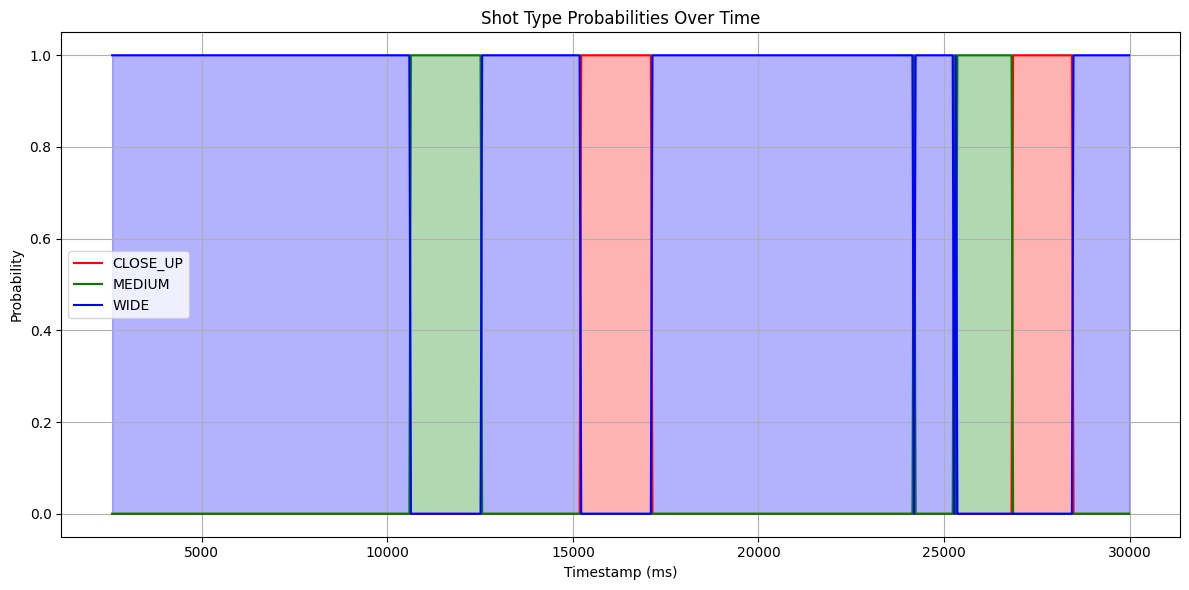

In [2]:

columns = ['Timestamp', 'Prob_ShotType_CLOSE_UP', 'Prob_ShotType_MEDIUM', 'Prob_ShotType_WIDE']
df_selected = df_selected = df[df['Timestamp'] <= 30000][columns].dropna()


plt.figure(figsize=(12, 6))

plt.fill_between(df_selected['Timestamp'], df_selected['Prob_ShotType_CLOSE_UP'], color='red', alpha=0.3)
plt.fill_between(df_selected['Timestamp'], df_selected['Prob_ShotType_MEDIUM'], color='green', alpha=0.3)
plt.fill_between(df_selected['Timestamp'], df_selected['Prob_ShotType_WIDE'], color='blue', alpha=0.3)

plt.plot(df_selected['Timestamp'], df_selected['Prob_ShotType_CLOSE_UP'], label='CLOSE_UP', color='red')
plt.plot(df_selected['Timestamp'], df_selected['Prob_ShotType_MEDIUM'], label='MEDIUM', color='green')
plt.plot(df_selected['Timestamp'], df_selected['Prob_ShotType_WIDE'], label='WIDE', color='blue')

plt.xlabel("Timestamp (ms)")
plt.ylabel("Probability")
plt.title("Shot Type Probabilities Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()